In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan

%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [4]:
df = pd.read_excel('./data/real_estate1.xlsx')

In [5]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      23 non-null     int64 
 1   space   23 non-null     int64 
 2   room    23 non-null     object
 3   value   23 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 864.0+ bytes


In [7]:
df.describe()

,id,space,value
count,23.00000,23.000000,23.000000
mean,12.00000,70.869565,4834.782609
std,6.78233,11.246431,1044.095387
min,1.00000,50.000000,3050.000000
25%,6.50000,70.000000,4200.000000
50%,12.00000,70.000000,4690.000000
75%,17.50000,70.000000,5460.000000
max,23.00000,90.000000,7110.000000


In [8]:
df.corr()

,id,space,value
id,1.000000,0.202611,-0.072405
space,0.202611,1.000000,0.841184
value,-0.072405,0.841184,1.000000


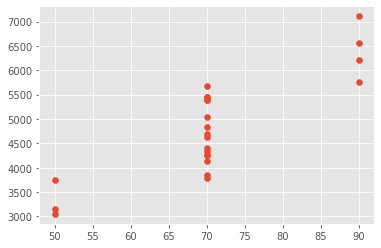

In [9]:
plt.scatter(df['space'], df['value'])

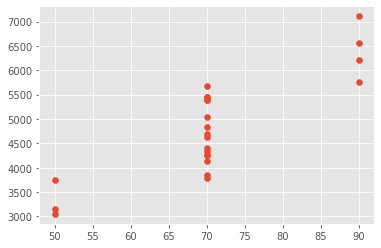

In [10]:
plt.scatter(df.space, df.value)

In [11]:
stan_model = """
data {
  int N;
  real X[N];
  real Y[N];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
    Y[n] ~ normal(a * X[n] + b, sigma);
  }
}

"""

In [12]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ef597a9137b242c406fc64a47bf328b NOW.


In [14]:
stan_data = {'N':df.shape[0], 'X':df['space'], 'Y':df['value']}

In [15]:
fit = sm.sampling(data=stan_data, iter=2000, warmup=500, chains=3, seed=123)

In [16]:
fit

Inference for Stan model: anon_model_1ef597a9137b242c406fc64a47bf328b.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      77.99    0.33  11.86  53.99   70.6  78.34  85.69 100.49   1277    1.0
b     -692.9   23.85 850.19  -2301  -1243 -718.7 -164.6 1068.0   1271    1.0
sigma 621.72    2.71 106.36 457.19 545.24 607.26 682.49  870.5   1539    1.0
lp__  -152.0    0.04   1.37 -155.5 -152.6 -151.7 -151.0 -150.5   1306    1.0

Samples were drawn using NUTS at Sat May 23 17:30:03 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

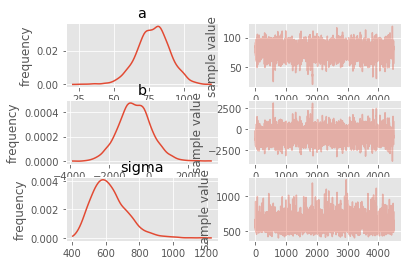

In [17]:
fig = fit.plot()

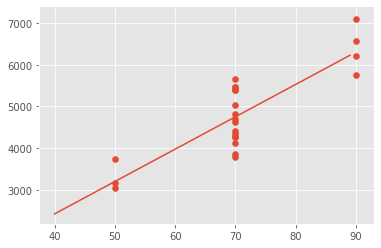

In [20]:
a = 77.79
b = -692.9
x = np.arange(40, 90, 1)
y = a * x + b
plt.plot(x, y)
plt.scatter(df['space'], df['value'])